# **Ejercicio 1**: Análisis del primer dataset.

Inicializamos las bibliotecas:

In [ ]:
import pandas as pd
import seaborn as sns 
import numpy as np
import matplotlib.pyplot as plt

Abrimos un dataset y lo visualizamos:

In [ ]:
datas = pd.read_csv('/content/ejercicio1_2.csv', header=0, sep=";")
print(datas)
print(datas.shape)

    informeNumero      fecha  ...  sedes_ucma  observaciones
0             131  25/9/2020  ...           4            NaN
1             130  24/9/2020  ...           4            NaN
2             129  23/9/2020  ...           4            NaN
3             128  22/9/2020  ...           4            NaN
4             127  21/9/2020  ...           4            NaN
..            ...        ...  ...         ...            ...
83             10   4/7/2020  ...           3            NaN
84              9   3/7/2020  ...           3            NaN
85              8   2/7/2020  ...           3            NaN
86              7   1/7/2020  ...           3            NaN
87              1  30/6/2020  ...           3            NaN

[88 rows x 19 columns]
(88, 19)


Calculamos algunas variables estadísticas (media, desvío estandar, etc):

In [ ]:
print(datas['total_camas_ocupadas_ucma'].describe())


count    88.000000
mean      5.170455
std       4.334363
min       0.000000
25%       3.000000
50%       4.000000
75%       6.000000
max      21.000000
Name: total_camas_ocupadas_ucma, dtype: float64


Graficamos el histograma y boxplot de las distintas variables del dataset:

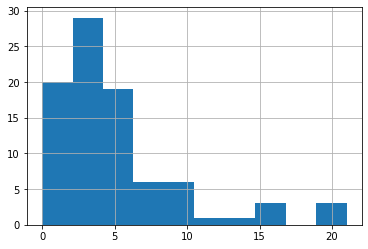

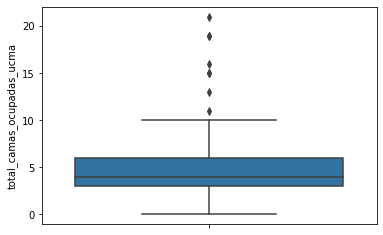

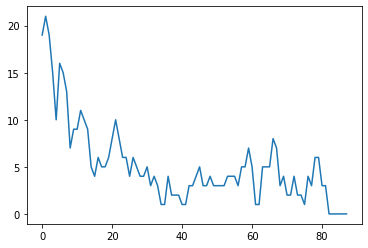

In [ ]:
graf1=datas['total_camas_ocupadas_ucma'].hist()
plt.show(graf1)
graf2=sns.boxplot(y=datas['total_camas_ocupadas_ucma'])
plt.show(graf2)
graf3=datas['total_camas_ocupadas_ucma'].plot()
plt.show(graf3)


### Respuestas sobre el primer dataset:


*   Las observaciones del dataset son acumulativas por lo que para facilitar el análisis habría que obtener el conteo diario de las distintas variables/atributos.
*   No se puede determinar directamente si la distribución de las observaciones es normal o Gaussiana debido al caracter acumulativo, y aún obteniendo el conteo diario no cumplen con algunas condiciones básicas como pueden ser:
    *   Ser simétricas respecto a la media.
    *   Tener el máximo en la media.
    *   Crece hasta la media y decrece a partir de ella.


# **Ejercicio 1:** Análisis del segundo dataset.



Hacemos el mismo análisis exploratorio con el segundo dataset, en este caso la toma de datos/observaciones no son acumulativas.

### Repuestas sobre el segundo dataset:


*   En el caso de la variable "total_camas_hospitales" las observaciones se mantienen relativamente constantes en el tiempo, aunque ciertas observaciones figuran en cero. 
*   Las variables "camas_sospechosos_covid" y "respiradores_ocupados" son las que presentan una distribución más parecida a la normal o Gaussiana.
*   A partir de cierta fecha no contamos con datos de las variables "respiradores_covid_totales" y "respiradores_covid_ocupados".




# **Ejercicio 2:**: Generar un dataset con dos conjuntos Gaussianos (con diferente media y desvío estandar). Encontrar el umbral de clasificación por mínimo error usando la curva ROC y evaluar parámetros de calidad del clasificador.


Inicializamos las bibliotecas básicas.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Importamos las herramientas de la biblioteca de skilearn para generar nuestra curva ROC.

In [ ]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

Creamos 2 conjuntos de datos que sigan una distribución Gaussiana con 50 muestras cada uno, distinta media y desvío.

In [ ]:
dat1, dat2 = make_classification(n_samples=100, n_classes=2,random_state=2)
print(dat1)
graf1=plt.hist(dat1)
plt.show(graf1)
print(dat2)
graf2=plt.hist(dat2)
plt.show(graf2)

Otra opción:

In [ ]:
#med1,des1=(20,5) #media y desvío del primer muestreo
#d1=np.random.normal(med1,des1,50)
#dt1=np.round(d1)
#print(dt1)
#graf1=plt.hist(dt1)
#plt.show(graf1)

#med2,des2=(15,4) #media y desvío del segundo muestreo
#d2=np.random.normal(med2,des2,50)
#dt2=np.round(d2)
#print(dt2)
#graf2=plt.hist(dt2)
#plt.show(graf2)

Generamos nuestros sets de entrenamiento y testeo para usar luego en la clasificación.

In [ ]:
train_dat1, test_dat1, train_dat2, test_dat2=train_test_split(dat1, dat2, test_size=0.5, random_state=2)
print(train_dat1)
print(train_dat2)

Generamos una curva de clasificación aleatoria.

In [ ]:
prob_aleat = [0 for _ in range(len(test_dat2))]

Aplicamos un método de clasificación a nuestro dataset.

In [ ]:
model=LogisticRegression(solver='lbfgs')
model.fit(train_dat1,train_dat2)

Predecimos las probabilidades de las dos clases.

In [ ]:
logreg_probs = model.predict_proba(test_dat1)
print(logreg_probs)

Del total predicho nos quedamos unicamente con los resultados positivos.

In [ ]:
logreg_probs = logreg_probs[:,1]
print(logreg_probs)

Calculamos los resultados del AUC (área bajo la curva) para la regresión logística y la clasificación aleatoria:

In [ ]:
aleat_auc = roc_auc_score(test_dat2, prob_aleat)
logreg_auc = roc_auc_score(test_dat2,logreg_probs)
print('Aleatoria: ROC AUC=',(aleat_auc))
print('Logística: ROC AUC=',(logreg_auc))

Calculamos la curva ROC:

In [ ]:
aleat_fpr, aleat_tpr, _ = roc_curve(test_dat2, prob_aleat)
logreg_fpr, logreg_tpr, _ = roc_curve(test_dat2, logreg_probs)

Graficamos la curva ROC para este ejemplo.

In [ ]:
plt.plot(aleat_fpr, aleat_tpr, label="Aleatoria")
plt.plot(logreg_fpr, logreg_tpr, label="Regresión Logística")
plt.xlabel("False Positive Rate") #Agregamos el nombre al eje X
plt.ylabel("True Positive Rate")  #Agregamos el nombre al eje Y
plt.legend()  #Agregamos las referencias
plt.show()  #Mostramos el gráfico completo